## CUSTOMER CHURN PREDICTION - Vodafone Coporation

### Introduction:
Customer churn prediction is a critical task for businesses operating in subscription-based industries such as telecommunications, software as a service (SaaS), and retail. Churn refers to the phenomenon where customers discontinue their relationship with a company or (unsubscribe) stop using its services. It is essential for businesses to identify and understand the factors that contribute to churn in order to take proactive measures to retain customers and maximize revenue.

### Business Understanding:
#### **Project Scenario**

In today's world of machine leaening, most companies build classification models to perform churn analysis on their customers. We have been tasked to create a prediction model for a telecommunication compant to help predict if a customer will churn or not. We are also to help them understand their data and know what factors affect the rate at which customers stop using their network to understand their data.

#### **Hypothesis**
 Null hypothesis - There is a dominant attribute that affects churn
   
 
Alternative hypothesis - There is no dominant attribute that affects churn

#### **Analytical Questions**
 
1. What is the total churn rate?
2. How does the different boolean attributes affect the churn?
3. How does the different non-boolean attributes affect the churn?
4. How does the different numerical attributes affect the churn?
5. How does tenure affect the churn?
6. How does the type of internet service affect churn?
7. How does the type of contract affect the churn?
8. How does the type of payment method affect the churn?

### Data Understanding:

The first dataset consists of the first 3000 records of the companies customer churn data. This dataset was stored in a remote database and to access it, a connection to the Microsoft SQL Server database using an Open Database Connectivity (ODBC) library such as pyodbc or an Object-Relational Mapping (ORM) library like SQLAlchemy needs to be established. This allows for querying the database and retrieving the records.

The second dataset is a csv file, with 2000 records and the third dataset is the test dataset.

The following describes the columns present in the data.

| Variable         | Description                                       | Data Type | Possible Values                          |
|------------------|---------------------------------------------------|-----------|------------------------------------------|
| customerID       | Unique identifier for each customer               | String    |                                          |
| gender           | Gender of the customer                            | String    | 'Male', 'Female'                        |
| SeniorCitizen    | Indicates if the customer is a senior citizen     | Boolean   | True (1), False (0)                     |
| Partner          | Indicates if the customer has a partner           | Boolean   | True (1), False (0)                     |
| Dependents       | Indicates if the customer has dependents          | Boolean   | True (1), False (0)                     |
| tenure           | Number of months the customer has been with the company | Integer |                                          |
| PhoneService     | Indicates if the customer has phone service       | Boolean   | True (1), False (0)                     |
| MultipleLines    | Indicates if the customer has multiple lines      | String    | 'Yes', 'No', 'No phone service'        |
| InternetService  | Type of internet service                          | String    | 'DSL', 'Fiber optic', 'No'             |
| OnlineSecurity   | Indicates if the customer has online security     | String    | 'Yes', 'No', 'No internet service'     |
| DeviceProtection | Indicates if the customer has device protection   | String    | 'Yes', 'No', 'No internet service'     |
| TechSupport      | Indicates if the customer has tech support        | String    | 'Yes', 'No', 'No internet service'     |
| StreamingTV      | Indicates if the customer has streaming TV        | String    | 'Yes', 'No', 'No internet service'     |
| StreamingMovies  | Indicates if the customer has streaming movies    | String    | 'Yes', 'No', 'No internet service'     |
| Contract         | Type of contract                                  | String    | 'Month-to-month', 'One year', 'Two year' |
| PaperlessBilling | Indicates if the customer has paperless billing  | Boolean   | True (1), False (0)                     |
| PaymentMethod    | Payment method                                    | String    | 'Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)' |
| MonthlyCharges   | Monthly charges                                   | Float     |                                          |
| TotalCharges     | Total charges                                     | Float     |                                          |
| Churn            | Indicates if the customer churned                | Boolean   | True (1), False 

#### **Data Connection**

In [181]:
# Import the necessary packages
# Data handling
import pyodbc
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import openpyxl

# For creating connection
import pyodbc
import requests

# For loading environment variables
from dotenv import dotenv_values
import dotenv
import io

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
from plotly.subplots import make_subplots

# Statistics
from statsmodels.genmod.families import Binomial
from scipy.stats import pointbiserialr
import scipy.stats as stats
import random

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Other packages
import os
import warnings
warnings.filterwarnings('ignore')

In [182]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

In [183]:
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [184]:
#creating a connection sring to the SQL  database
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [185]:
# Creating a connection
connection = pyodbc.connect(connection_string)

##### *Load the First Dataset*

In [186]:
# Loading the first data set from the database
query = "Select * from dbo.LP2_Telco_churn_first_3000"

data1 = pd.read_sql(query, connection)

In [187]:
# The first five rows of the first dataset
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [188]:
# Description of the data 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [189]:
# View missing values
data1.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [190]:
# View columns and rows
data1.shape

(3000, 21)

In [191]:
# Checking if there are duplicates
data1.duplicated().sum()

0

##### *Load the Second Dataset*

In [192]:
# Loading the second dataset from the Data directory
# csv_file_path = 'Data/LP2_Telco-churn-second-2000.csv'

# Load the CSV file into a pandas DataFrame
# data2 = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
# data2.head()

# Loading the second dataset from a GitHub repository
url = 'https://raw.github.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/main/LP2_Telco-churn-second-2000.csv'
download = requests.get(url).content
data2 = pd.read_csv(io.StringIO(download.decode('utf-8')))
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [193]:
# View of the data information
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [194]:
# View missing values
data1.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [195]:
# View columns and rows
data2.shape

(2043, 21)

In [196]:
# Checking if there are duplicates
data2.duplicated().sum()

0

##### *Load the Testing Dataset*

In [197]:
data3 = pd.read_excel('Data/Telco-churn-last-2000.xlsx')
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [198]:
# View of the data information
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [199]:
# View missing values
data3.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [200]:
# View columns and rows
data3.shape

(2000, 20)

In [201]:
# Checking if there are duplicates
data3.duplicated().sum()

0

##### *Observations of the First (data1) and Second (data2) Dataset*
data1
- The data has missing values
- The dataset has 3000 rows and 21 columns
- There are no duplicates

data2
- There are no missing values
- The totalcharges column is an object instead of a float
- The dataset has 2043 rows and 21 columns

##### *Observations of the Testing (data3) Dataset*
data3
- The dataset has 2000 rows and 20 columns


#### **Cleaning the First Dataset**

In [202]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [203]:
# Deleting Customer ID column
del data1["customerID"]

In [204]:
# Convert boolean columns to object datatype
bool_to_obj = {'Partner': object,
               'SeniorCitizen': object,
               'Dependents': object, 
               'PhoneService': object,
               'PaperlessBilling': object}

data = data1.astype(bool_to_obj)

In [205]:
# Replace True and False values with Yes and No in Object columns
replace_values = {True: 'Yes', False: 'No'}

# Use the replace() method
data1['Partner'] = data1['Partner'].replace(replace_values)
data1['SeniorCitizen'] = data1['SeniorCitizen'].replace(replace_values)
data1['Dependents'] = data1['Dependents'].replace(replace_values)
data1['PhoneService'] = data1['PhoneService'].replace(replace_values)
data1['MultipleLines'] = data1['MultipleLines'].replace(replace_values)
data1['OnlineSecurity'] = data1['OnlineSecurity'].replace(replace_values)
data1['OnlineBackup'] = data1['OnlineBackup'].replace(replace_values)
data1['DeviceProtection'] = data1['DeviceProtection'].replace(replace_values)
data1['TechSupport'] = data1['TechSupport'].replace(replace_values)
data1['StreamingTV'] = data1['StreamingTV'].replace(replace_values)
data1['StreamingMovies'] = data1['StreamingMovies'].replace(replace_values)
data1['PaperlessBilling'] = data1['PaperlessBilling'].replace(replace_values)
data1['Churn'] = data1['Churn'].replace(replace_values)

In [206]:
# View unique values in target column (Churn)
data1['Churn'].unique()

array(['No', 'Yes', None], dtype=object)

In [207]:
# Check the missing values in target column (Churn)
data1['Churn'].isna().sum()

1

In [208]:
# Drop the missing value in the Churn column
data1.dropna(subset='Churn', inplace=True)

In [209]:
# View all missing values 
data1.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 0
dtype: int64

In [210]:
# View the missing values in TotalCharges column
data1[np.isnan(data1['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,None,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,None,None,None,None,None,None,Two year,No,Mailed check,20.250000,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,None,None,None,None,None,None,Two year,No,Mailed check,25.750000,NaN,No
1340,Female,No,Yes,Yes,0,No,None,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No


The missing values in TotalCharges have a tenure of 0, even though there are values in the MonthlyCharges column. We can simply drop those rows to avoid confusion.

In [211]:
# Drop rows where tenure = 0
data1.drop(data1[data1['tenure'] == 0].index, inplace = True)

In [212]:
# Replace the remaining missing valuexs with the mode of their respective columns
column_to_replace = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for column in column_to_replace:
    data1[column].fillna(data[column].mode()[0], inplace=True)

In [213]:
# Reset index after dropping rows
data1.reset_index(drop=True, inplace=True)

In [214]:
# View the dataset info
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994 entries, 0 to 2993
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2994 non-null   object 
 1   SeniorCitizen     2994 non-null   object 
 2   Partner           2994 non-null   object 
 3   Dependents        2994 non-null   object 
 4   tenure            2994 non-null   int64  
 5   PhoneService      2994 non-null   object 
 6   MultipleLines     2994 non-null   object 
 7   InternetService   2994 non-null   object 
 8   OnlineSecurity    2994 non-null   object 
 9   OnlineBackup      2994 non-null   object 
 10  DeviceProtection  2994 non-null   object 
 11  TechSupport       2994 non-null   object 
 12  StreamingTV       2994 non-null   object 
 13  StreamingMovies   2994 non-null   object 
 14  Contract          2994 non-null   object 
 15  PaperlessBilling  2994 non-null   object 
 16  PaymentMethod     2994 non-null   object 


#### **Cleaning the Second Dataset**

In [215]:
# View the dataset info
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [216]:
# Drop the customerID column
data2.drop(columns='customerID', inplace=True)

In [217]:
# Change the TotalCharges datatype from object to numeric
data2['TotalCharges'] = pd.to_numeric(data2['TotalCharges'], errors='coerce')

In [218]:
# Concat (merge) data1 and data2
training_data = pd.concat([data1, data2], ignore_index = True)

# View the first five columns 
training_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,False,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,No,No,No,45,No,False,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


#### **Cleaning the Training Dataset**

In [219]:
# Training data info after concatinating
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5037 entries, 0 to 5036
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5037 non-null   object 
 1   SeniorCitizen     5037 non-null   object 
 2   Partner           5037 non-null   object 
 3   Dependents        5037 non-null   object 
 4   tenure            5037 non-null   int64  
 5   PhoneService      5037 non-null   object 
 6   MultipleLines     5037 non-null   object 
 7   InternetService   5037 non-null   object 
 8   OnlineSecurity    5037 non-null   object 
 9   OnlineBackup      5037 non-null   object 
 10  DeviceProtection  5037 non-null   object 
 11  TechSupport       5037 non-null   object 
 12  StreamingTV       5037 non-null   object 
 13  StreamingMovies   5037 non-null   object 
 14  Contract          5037 non-null   object 
 15  PaperlessBilling  5037 non-null   object 
 16  PaymentMethod     5037 non-null   object 


There are some missing values in the TotalCharges column,therefore delete the rows with a tenure of 0

In [220]:
# View missing values in TotalCharges column
training_data[np.isnan(training_data['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3212,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
4664,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
4748,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No


In [221]:
# Drop rows where tenure = 0
training_data.drop(labels=training_data[training_data['tenure'] == 0]. index, axis=0, inplace=True)

In [222]:
# Checking all categorocal values
training_data.describe(include=['object']).T

,count,unique,top,freq
gender,5034,2,Male,2554
SeniorCitizen,5034,4,No,2519
Partner,5034,2,No,2583
Dependents,5034,2,No,3481
PhoneService,5034,2,Yes,4547
MultipleLines,5034,4,No,2421
InternetService,5034,3,Fiber optic,2247
OnlineSecurity,5034,4,No,2506
OnlineBackup,5034,4,No,2230
DeviceProtection,5034,4,No,2218


In [223]:
#Seniorcitizen column has more unique values 
training_data['SeniorCitizen'].value_counts()

SeniorCitizen
No     2519
0      1696
Yes     475
1       344
Name: count, dtype: int64

In [224]:
# Replace 'No' values with 0 and 'Yes' values with 1
training_data['SeniorCitizen'] = training_data['SeniorCitizen'].replace({'No': 0, 'Yes': 1})

In [225]:
training_data['SeniorCitizen'] = training_data['SeniorCitizen'].astype('object')

In [226]:
# Checking for duplicates
print('Known observations: {}\nUnique observations: {}'.format(len(training_data.index),len(training_data.drop_duplicates().index)))
print("**No duplicates Found!**")

Known observations: 5034
Unique observations: 5024
**No duplicates Found!**


In [ ]:
# View unique values of each column
for column in training_data.columns:
    print('Column: {} - Unique Values: {}'.format(column, training_data[column].unique()))

In [ ]:
# Summary statistics
training_data.describe()

In [ ]:
# Check for outliers in the numerical variables
# Use boxplot
for col in ['tenure','MonthlyCharges','TotalCharges']:
    print(col)
    plt.boxplot(training_data[col])
    plt.show()

##### **Saving the Training Dataset**

In [ ]:
# Reset the index
training_data.reset_index(drop=True, inplace=True)

In [227]:
#Saving to csv
training_data.to_csv('Train_Data.csv', index=False)

#### **Cleaning theTest Dataset**

In [ ]:
# View the dataset info
data3.info()

In [ ]:
# Drop Customer ID column
data3.drop(columns='customerID', inplace=True)

In [ ]:
# Change Datatype of TotalCharges column from object to numeric
data3['TotalCharges'] = pd.to_numeric(data3['TotalCharges'], errors='coerce')

In [ ]:
# View missing values in TotalCharges column
data3[np.isnan(data3['TotalCharges'])]

In [ ]:
# Drop rows where tenure = 0
data3.drop(labels=data3[data3['tenure'] == 0].index, axis=0, inplace=True)

In [ ]:
# View the dataset info
data3.info()

In [ ]:
# Reset index
data3.reset_index(drop=True, inplace=True)

In [ ]:
# Check for null values
data3.isnull().sum()

In [ ]:
data3['SeniorCitizen'] = data3['SeniorCitizen'].astype('object')

#### **Exploratory Data Analysis**

In [228]:
# Summary statistics of numerical columns
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5034.0,32.620580,24.511015,1.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5034.0,65.107251,30.068019,18.400000,35.799999,70.599998,90.050003,118.650002
TotalCharges,5034.0,2300.954758,2268.346402,18.799999,417.662498,1401.000000,3860.599976,8670.100000


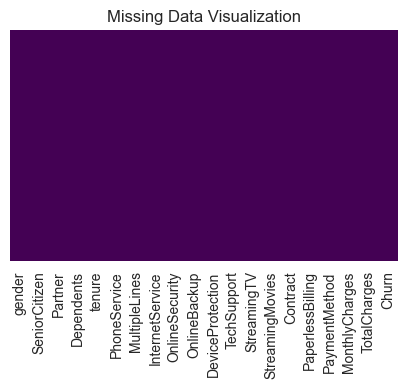

Missing Values Summary:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [229]:
# Visualize the missing values
# Checking for missing values in the training data
missing_values = training_data.isnull().sum()

# Visualize the data
plt.figure(figsize=(5,3))
sns.heatmap(training_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display the missing values summary
print('Missing Values Summary:\n', missing_values)

                              

In [230]:
# Checking for duplicates on the training data
training_data.duplicated().sum()

10

In [231]:
# Convert the churn column to boolean from object since it is the 'predicted column'

def convert_to_yes_no(df, columns):
    """
    Converts multiple columns with mixed values (True, False, Yes, No) to only Yes and No.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the columns to be converted.
    - columns (list of str): List of column names to convert.
    
    Returns:
    - pd.DataFrame: DataFrame with the specified columns converted to Yes and No.
    """
    # Define a mapping from the original values to the new values
    conversion_map = {
        True: 'Yes',
        'True': 'Yes',
        False: 'No',
        'False': 'No',
        'Yes': 'Yes',
        'No': 'No',
        'yes': 'Yes',
        'no': 'No',
        'YES': 'Yes',
        'NO': 'No',
        # 'Y': 'Yes',
        # 'N': 'No'        
    }

    # Apply the conversion map to the specified columns
    for column in columns:
        if column in df.columns:
            df[column] = df[column].map(conversion_map)

    return df

# Assuming 'training_data' is your DataFrame and already defined
# Example column names to be converted
columns_to_convert = ['Churn','Partner', 'Dependents', 'PhoneService']

# Convert specified columns to only contain Yes and No
df = convert_to_yes_no(training_data, columns_to_convert)

print("\nDataFrame after prepocessing")
clean_train_data=df

clean_train_data.head()


DataFrame after prepocessing


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,False,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,False,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [232]:
# Convert monthlycharges and totalcharges column datatype to int
df = pd.DataFrame(clean_train_data)

# Fill NaN values with 0
df['TotalCharges'].fillna(0, inplace=True)

# Convert columns from float to int
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)
df['TotalCharges'] = df['TotalCharges'].astype(int)


# Display the DataFrame after conversion
print('\nDataFrame after converting float to int')
clean_train_data = df


DataFrame after converting float to int


In [233]:
# Drop the 'customerID' column
clean_training_data = clean_train_data.drop('customerID', axis=1)

# Display the DataFrame
print("\nDataFrame after dropping the 'customerID' column:")
print(clean_training_data.head())

KeyError: "['customerID'] not found in axis"

In [ ]:
clean_training_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29,29,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56,1889,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53,108,Yes
3,Male,No,No,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1840,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70,151,Yes


In [ ]:
clean_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            5042 non-null   object
 1   SeniorCitizen     5042 non-null   object
 2   Partner           5042 non-null   object
 3   Dependents        5042 non-null   object
 4   tenure            5042 non-null   int64 
 5   PhoneService      5042 non-null   object
 6   MultipleLines     4773 non-null   object
 7   InternetService   5042 non-null   object
 8   OnlineSecurity    4391 non-null   object
 9   OnlineBackup      4391 non-null   object
 10  DeviceProtection  4391 non-null   object
 11  TechSupport       4391 non-null   object
 12  StreamingTV       4391 non-null   object
 13  StreamingMovies   4391 non-null   object
 14  Contract          5042 non-null   object
 15  PaperlessBilling  5042 non-null   object
 16  PaymentMethod     5042 non-null   object
 17  MonthlyCharges

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

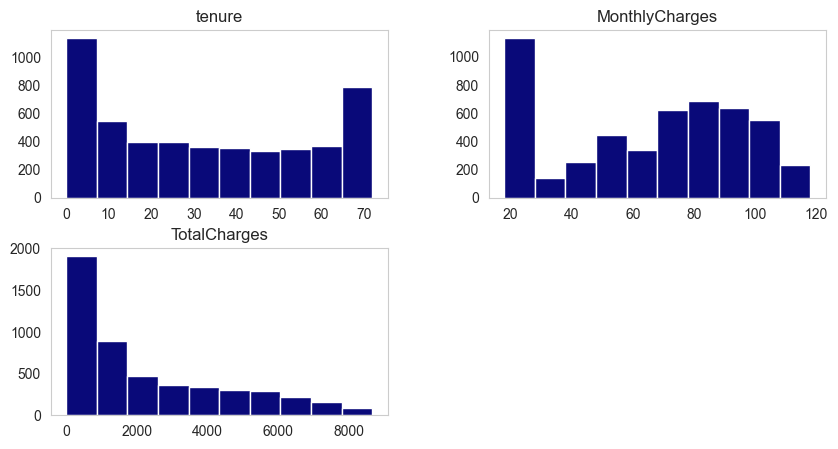

In [ ]:
# Numerical column visual representation using histogram
clean_training_data.hist(figsize=(10,5), grid=False, color='#090979')

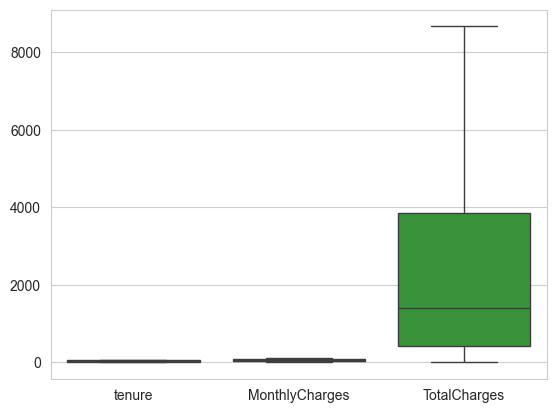

In [ ]:
# Checking outliers
sns.boxplot(clean_training_data, orient='v')
plt.show()

In [ ]:
mosaic(clean_training_data, ['Churn', 'gender'], title='Mosaic Plot of Churn vs Gender')
plt.show()

NameError: name 'mosaic' is not defined